In [152]:
import os
import numpy as np
import tensorflow as tf
import cv2
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [143]:
input_img = 'C:/Users/Administrator/Desktop/nuclei'

# tif 파일 경로 및 읽기
original_img_path = sorted([os.path.join(input_img, fname) 
                         for fname in os.listdir(input_img)
                         if fname.endswith('.tif')])
# mask 이미지 분류
mask_img_path = sorted([os.path.join(input_img, fname) 
                         for fname in os.listdir(input_img)
                         if fname.endswith('.png')])

In [144]:
print(original_img_path[0])
print(mask_img_path[0])

C:/Users/Administrator/Desktop/nuclei\10256_500_f00001_original.tif
C:/Users/Administrator/Desktop/nuclei\10256_500_f00001_mask.png


In [145]:
print(len(original_img_path))
print(len(mask_img_path))

141
141


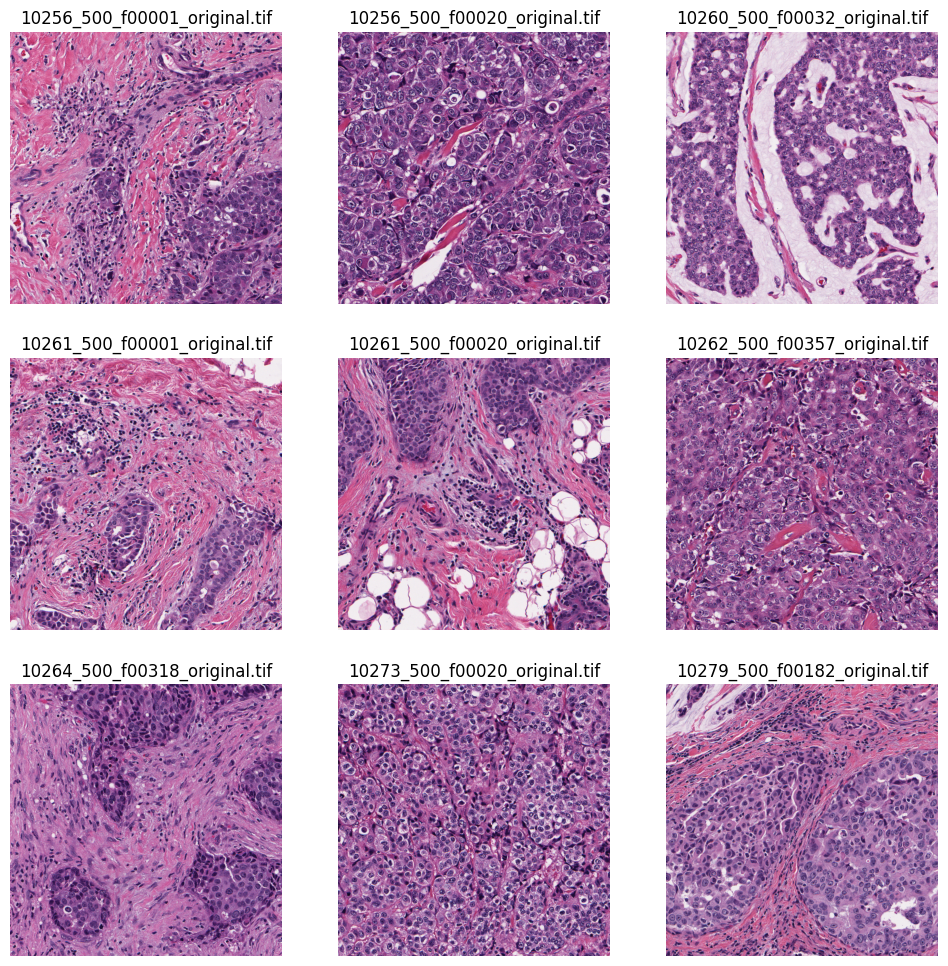

In [146]:
img_size = 512
input_img_size = (512, 512)

def read_img(path):
    img = cv2.imread(path)
    img = cv2.resize(img, input_img_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

rows = 3
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
for i, ax in enumerate(ax.flat):
    if i < len(original_img_path):
        original_img = read_img(original_img_path[i])
        ax.set_title(f'{os.path.basename(original_img_path[i])}')
        ax.imshow(original_img)
        ax.axis('off')


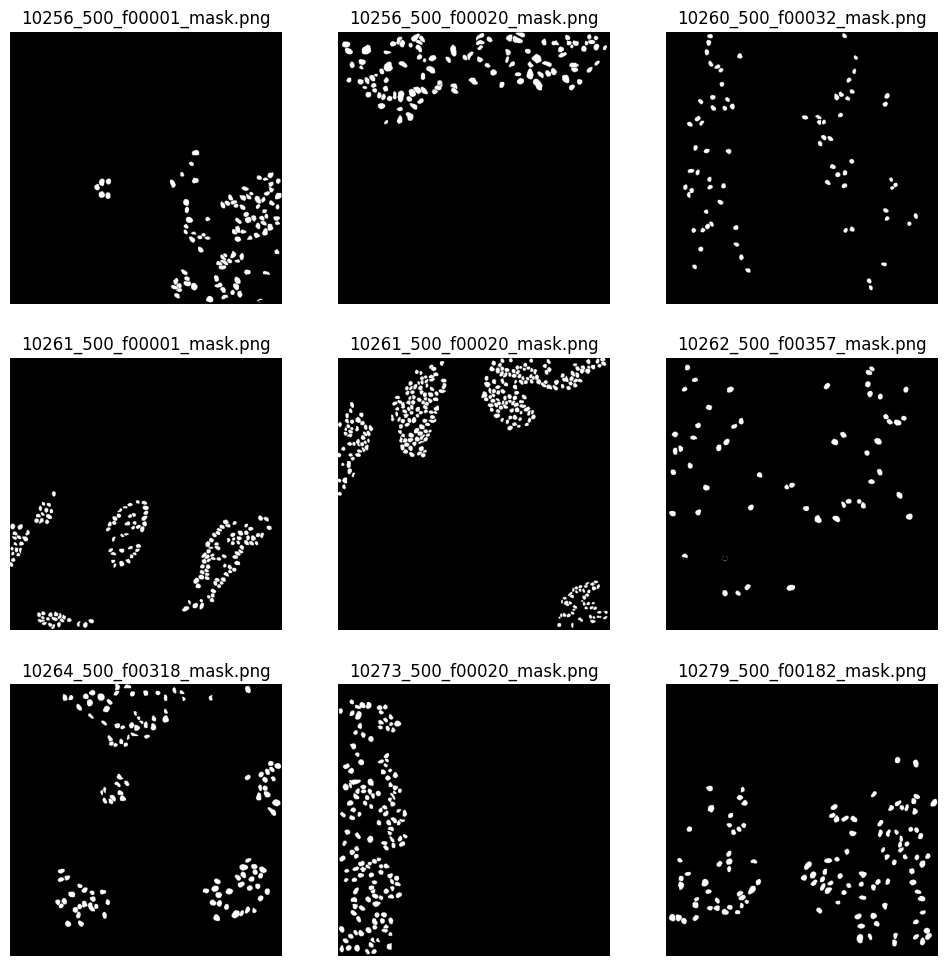

In [147]:
fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
for i, ax in enumerate(ax.flat):
    if i < len(mask_img_path):
        mask_img = read_img(mask_img_path[i])
        ax.set_title(f'{os.path.basename(mask_img_path[i])}')
        ax.imshow(mask_img)
        ax.axis('off')

In [150]:
MASK=np.zeros((1,img_size, img_size, 1), dtype=bool)
IMG=np.zeros((1,img_size, img_size, 3),dtype=np.uint8)

img_cnt = 141
for idx, path in enumerate(original_img_path[0:img_cnt]):
    try:
        img = read_img(original_img_path[idx])
        img_ex = np.expand_dims(img, axis=0)
        IMG = np.vstack([IMG, img_ex])
        mask = read_img(mask_img_path[idx])
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        mask = mask.reshape(512, 512, 1)
        mask_ex = np.expand_dims(mask, axis=0)
        MASK = np.vstack([MASK, mask_ex])
    except:
        print(path)
        continue

img_scaled = np.array(IMG)[1:img_cnt+1]
mask_scaled = np.array(MASK)[1:img_cnt+1]
print(img_scaled.shape, mask_scaled.shape)

(141, 512, 512, 3) (141, 512, 512, 1)


In [155]:
img_train, img_test, mask_train, mask_test = train_test_split(
    img_scaled, mask_scaled, test_size=0.4, random_state=42
)

print(len(img_train), len(mask_train))

84 84
